<a href="https://colab.research.google.com/github/adityapatil4141/Deep-learning/blob/main/Feature_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/work files /Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.drop(columns=['User ID','Gender'],inplace = True)

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

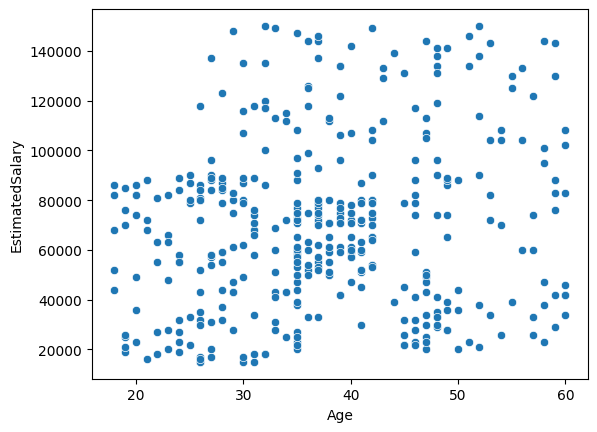

In [9]:
sns.scatterplot(x=df.iloc[:,0],y = df.iloc[:,1])

In [10]:
x = df.drop(columns = 'Purchased')
y = df['Purchased']

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=2)

In [12]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [13]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [16]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 20ms/step - loss: 296.3169 - accuracy: 0.5406 - val_loss: 315.5408 - val_accuracy: 0.6000
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 155.1593 - accuracy: 0.5406 - val_loss: 305.0584 - val_accuracy: 0.6000
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 201.0774 - accuracy: 0.4719 - val_loss: 75.0520 - val_accuracy: 0.6000
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 89.6891 - accuracy: 0.5844 - val_loss: 74.5622 - val_accuracy: 0.6000
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 36.7500 - accuracy: 0.5281 - val_loss: 1.0799 - val_accuracy: 0.6500
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 38.6996 - accuracy: 0.5188 - val_loss: 75.4273 - val_accuracy: 0.6000
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 66.5265 - accuracy: 0.5594 - val_loss: 44.9082 - val_accuracy: 0

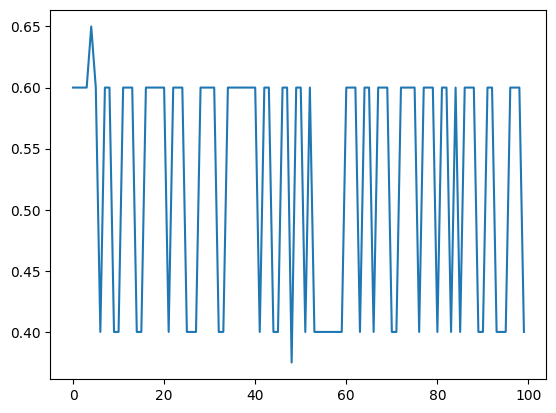

In [17]:
plt.plot(history.history['val_accuracy'])

# Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [23]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [24]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

history = model.fit(x_train_scaled,y_train,validation_data=(x_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 45ms/step - loss: 0.6741 - accuracy: 0.6469 - val_loss: 0.6480 - val_accuracy: 0.6625
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 0.6187 - accuracy: 0.7531 - val_loss: 0.5938 - val_accuracy: 0.7875
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5727 - accuracy: 0.7719 - val_loss: 0.5482 - val_accuracy: 0.7875
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.5329 - accuracy: 0.7875 - val_loss: 0.5107 - val_accuracy: 0.7750
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4990 - accuracy: 0.7969 - val_loss: 0.4783 - val_accuracy: 0.8000
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4695 - accuracy: 0.8094 - val_loss: 0.4509 - val_accuracy: 0.7875
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4437 - accuracy: 0.8156 - val_loss: 0.4269 - val_accuracy: 0.8000
Epoch 8/100

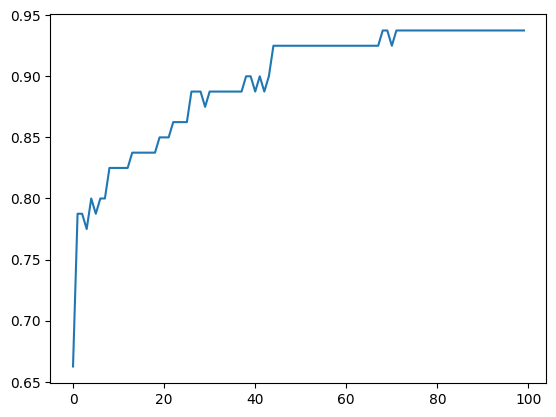

In [25]:
plt.plot(history.history['val_accuracy'])